# 確率ロボティクス 2021年度 課題
拡張カルマンフィルタを用いた自己位置推定のアルゴリズムをシミュレーションする．

In [20]:
# インポート
import matplotlib.pyplot as plt
import numpy as np
import math

In [68]:
class Robot:
    def __init__(self, x, y, th):
        self.actual_pose = [np.array([x, y, th])]
        self.pose = [np.array([x, y, th])]
        
    def updateRobotPos(self, d_dis, d_th):
        pre_x, pre_y, pre_th = self.actual_pose[-1]
                
        x = pre_x + d_dis * math.cos(pre_th)
        y = pre_y + d_dis * math.sin(pre_th)
        th = pre_th + d_th
        
        self.actual_pose.append(np.array([x, y, th]))
    

In [74]:
def plot(robot):
    fig = plt.figure(figsize=(10, 10))
    world = fig.add_subplot(1,1,1)
    world.set_xlim(-1.0,1.0)
    world.set_ylim(-0.5,1.5)

    plt.scatter(0.1, 0.1, s=300, marker="*", color="red")
    
    xs = [e[0] for e in robot.actual_pose]
    ys = [e[1] for e in robot.actual_pose]
    vxs = [math.cos(e[2]) for e in robot.actual_pose]
    vys = [math.sin(e[2]) for e in robot.actual_pose]
    plt.quiver(xs,ys,vxs,vys, color="blue")
    
    plt.show()

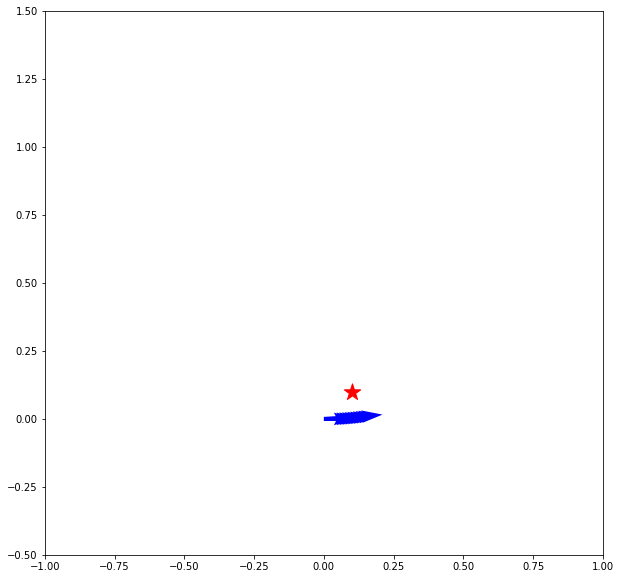

In [76]:
robot = Robot(0, 0, 0)

for i in range(0,10):
    robot.updateRobotPos(0.01, 0.01)

plot(robot)